In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [217]:
df=pd.read_csv('Prostate_Cancer.csv')

In [218]:
df.drop(['id'],axis=1,inplace=True)

In [219]:
Y=df.iloc[0:,0:1]
X=df.iloc[0:,2:9]
y_map={'M':1,'B':0}
Y['diagnosis_result'] = [y_map[item] for item in Y['diagnosis_result']]
seed=7

In [239]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#Type of Stacking
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [221]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = BaggingClassifier(base_estimator=neighbors.KNeighborsClassifier(),n_estimators=100, random_state=7)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.82


In [222]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model =RandomForestClassifier(n_estimators=100, random_state=7)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8299999999999998


In [243]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
model=neighbors.KNeighborsClassifier()
model.fit(x_train,y_train.values.ravel())
predictions=model.predict(x_test)
accuracy_score(y_test,predictions)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[ 4  0]
 [ 4 17]]
             precision    recall  f1-score   support

          0       0.50      1.00      0.67         4
          1       1.00      0.81      0.89        21

avg / total       0.92      0.84      0.86        25



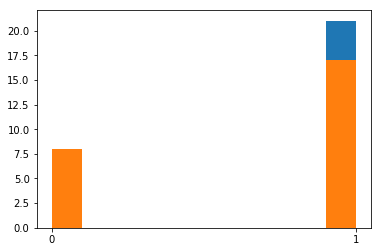

In [238]:
#plt.scatter(y_test, predictions)
plt.hist(y_test)
plt.hist(predictions)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model =ExtraTreesClassifier(n_estimators=100, random_state=7)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model =GradientBoostingClassifier(n_estimators=100, random_state=7)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model =VotingClassifier(estimators)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

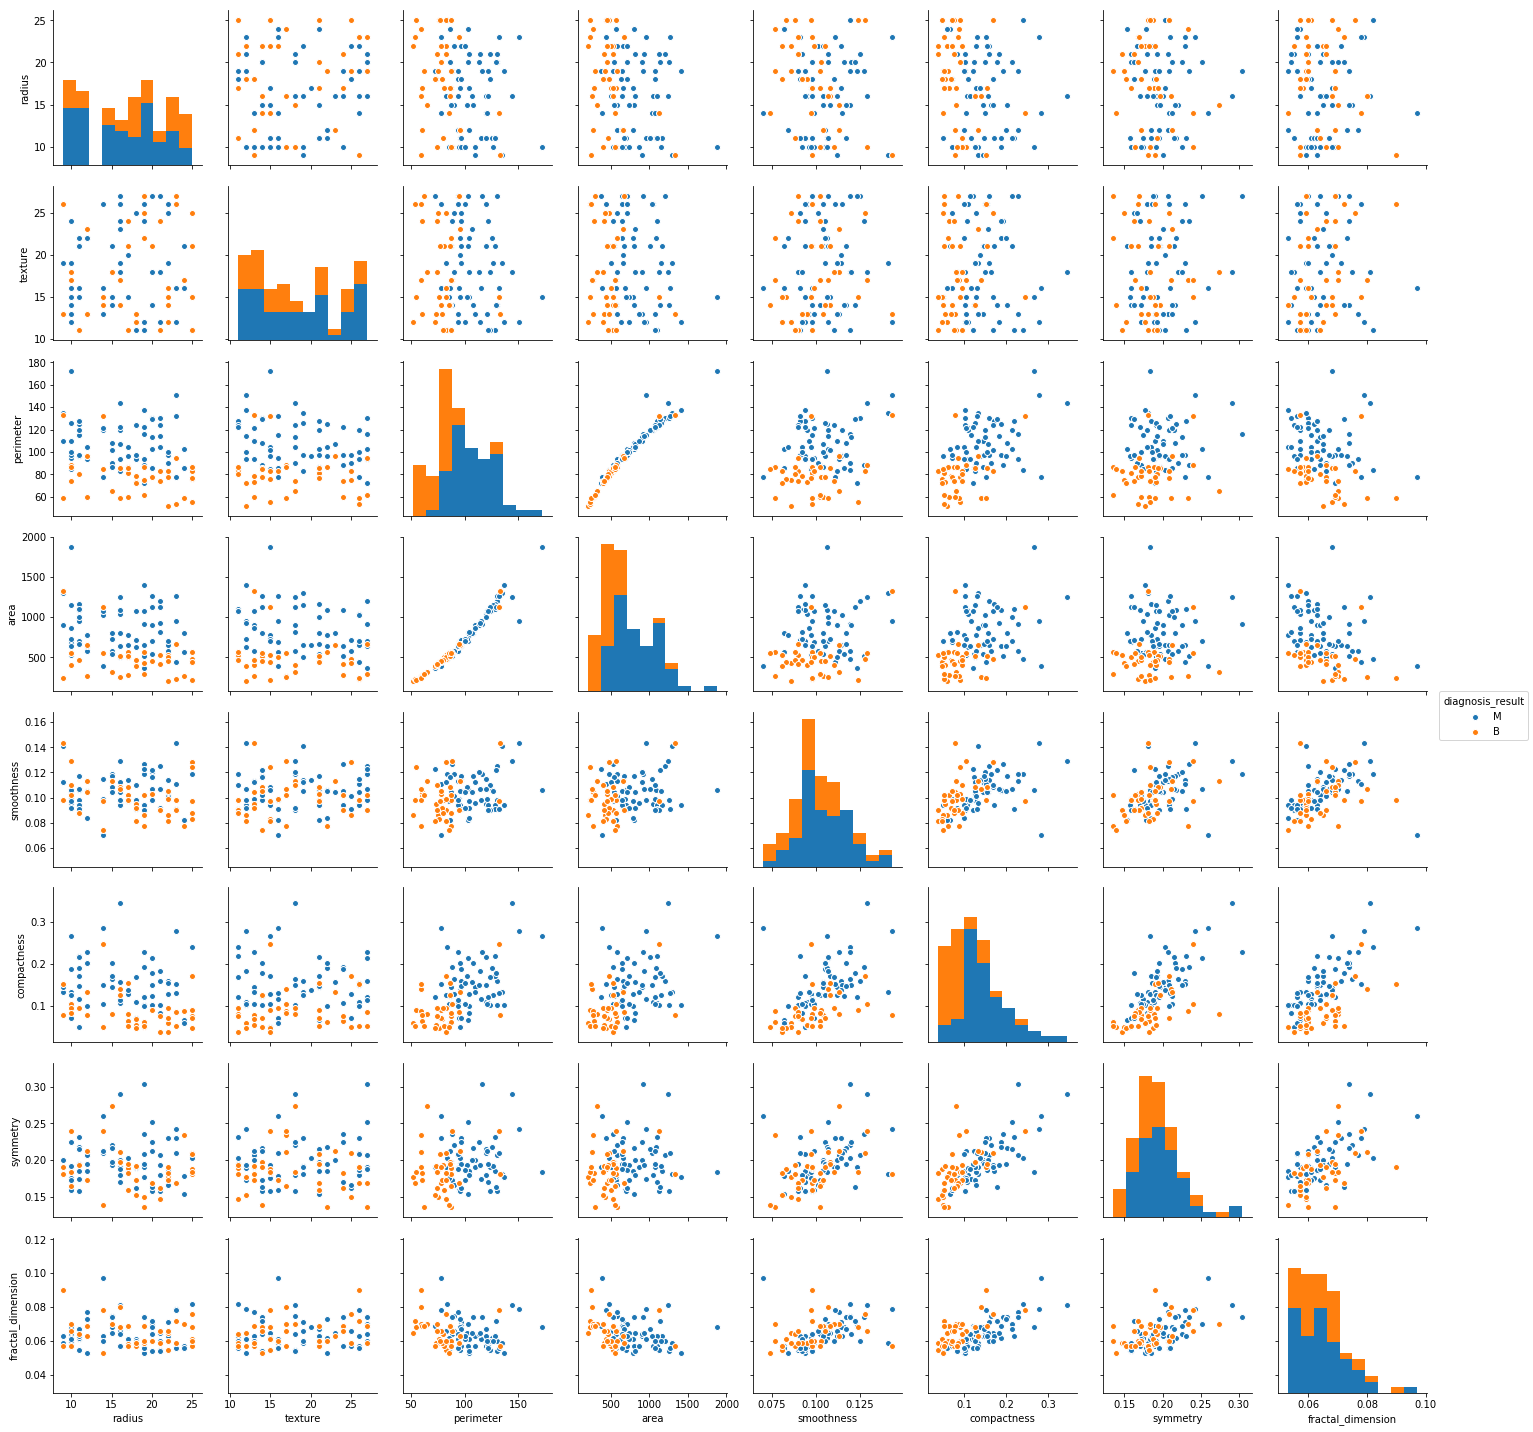

In [189]:
import seaborn as sn
sn.pairplot(data=df,hue="diagnosis_result")
